In [279]:
#Polynomial regression model 

In [280]:
import numpy as np 
import pandas as pd 

In [281]:
import matplotlib.pyplot as plt

In [282]:
df= pd.read_csv('Final_Model_data.csv',header=0,encoding = 'unicode_escape',index_col='rownum')

In [283]:
df.head()

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
1,30000000,862,Toy Story,21.946943,373554033,81,7.7,5415,7.684645,13,...,0,0,0,0,0,0,0,0,0,0
2,65000000,8844,Jumanji,17.015539,262797249,104,6.9,2413,6.876926,26,...,0,0,0,0,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,81452156,127,6.1,34,5.675590,10,...,0,0,0,0,0,0,0,0,0,0
4,0,11862,Father of the Bride Part II,8.387519,76578911,106,5.7,173,5.624595,12,...,0,0,0,0,0,0,0,0,0,0
5,60000000,949,Heat,17.924927,187436818,170,7.7,1886,7.656437,65,...,0,0,0,0,0,0,0,0,0,0


In [284]:
df.dtypes

budget                     int64
id                         int64
original_title            object
popularity               float64
revenue                    int64
runtime                    int64
vote_average             float64
vote_count                 int64
weighted_rating          float64
cast_size                  int64
crew_size                  int64
revenue_divide_budget    float64
movie_count                int64
director_Rank              int64
collection_Rank            int64
prod_Comp_Rank             int64
genres_Rank                int64
Genre_0                    int64
Genre_Action               int64
Genre_Adventure            int64
Genre_Animation            int64
Genre_Comedy               int64
Genre_Crime                int64
Genre_Documentary          int64
Genre_Drama                int64
Genre_Family               int64
Genre_Fantasy              int64
Genre_Foreign              int64
Genre_History              int64
Genre_Horror               int64
Genre_Musi

In [285]:
df.shape

(46623, 38)

In [286]:
#df.loc[df['revenue'] == 0.0]

In [287]:
df[df.revenue == 0.0]

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
6,58000000,11860,Sabrina,6.677277,0,127,6.2,141,6.014294,57,...,0,0,0,0,0,0,0,0,0,0
7,0,45325,Tom and Huck,2.561161,0,97,5.4,45,5.331446,7,...,0,0,0,0,0,0,0,0,0,0
11,0,12110,Dracula: Dead and Loving It,5.430331,0,88,5.7,210,5.635982,11,...,0,0,0,0,0,0,0,0,0,0
21,0,1710,Copycat,10.701801,0,124,6.5,199,6.316734,15,...,0,0,0,0,0,0,0,0,0,0
23,0,12665,Powder,12.133094,0,111,6.3,143,6.097279,5,...,0,0,0,0,0,0,0,0,0,0
25,0,16420,Othello,1.845899,0,123,7.0,33,6.119348,9,...,0,0,0,0,0,0,0,0,0,0
27,0,17015,Persuasion,2.228434,0,104,7.4,36,6.365010,26,...,0,0,0,0,0,0,0,0,0,0
29,0,37557,¾Ôà¥_¾Ôà_Î¾Ôàö¡_Ð© ¾Á´,1.100915,0,108,6.5,17,5.675302,6,...,0,0,0,0,0,0,0,0,0,0
32,0,78802,"Guillaumet, les ailes du courage",0.745542,0,50,6.8,4,5.438864,7,...,0,0,0,0,1,0,0,0,0,0


In [288]:
df[df.budget == 0.0]

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
4,0,11862,Father of the Bride Part II,8.387519,76578911,106,5.7,173,5.624595,12,...,0,0,0,0,0,0,0,0,0,0
7,0,45325,Tom and Huck,2.561161,0,97,5.4,45,5.331446,7,...,0,0,0,0,0,0,0,0,0,0
11,0,12110,Dracula: Dead and Loving It,5.430331,0,88,5.7,210,5.635982,11,...,0,0,0,0,0,0,0,0,0,0
12,0,21032,Balto,12.140733,11348324,78,7.1,423,6.961825,13,...,0,0,0,0,0,0,0,0,0,0
21,0,1710,Copycat,10.701801,0,124,6.5,199,6.316734,15,...,0,0,0,0,0,0,0,0,0,0
23,0,12665,Powder,12.133094,0,111,6.3,143,6.097279,5,...,0,0,0,0,0,0,0,0,0,0
25,0,16420,Othello,1.845899,0,123,7.0,33,6.119348,9,...,0,0,0,0,0,0,0,0,0,0
27,0,17015,Persuasion,2.228434,0,104,7.4,36,6.365010,26,...,0,0,0,0,0,0,0,0,0,0
29,0,37557,¾Ôà¥_¾Ôà_Î¾Ôàö¡_Ð© ¾Á´,1.100915,0,108,6.5,17,5.675302,6,...,0,0,0,0,0,0,0,0,0,0


In [289]:
indexNames = df[ (df['revenue'] == 0.0) | (df['budget'] == 0.0) ].index

In [290]:
#indexNames

In [291]:
df.drop(indexNames , inplace=True)

In [292]:
df.shape

(5458, 38)

In [293]:
df.head()

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
1,30000000,862,Toy Story,21.946943,373554033,81,7.7,5415,7.684645,13,...,0,0,0,0,0,0,0,0,0,0
2,65000000,8844,Jumanji,17.015539,262797249,104,6.9,2413,6.876926,26,...,0,0,0,0,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,81452156,127,6.1,34,5.675590,10,...,0,0,0,0,0,0,0,0,0,0
5,60000000,949,Heat,17.924927,187436818,170,7.7,1886,7.656437,65,...,0,0,0,0,0,0,0,0,0,0
8,35000000,9091,Sudden Death,5.231580,64350171,106,5.5,174,5.457491,6,...,0,0,0,0,0,0,0,0,0,0


In [294]:
df = df.drop(['id', 'original_title','revenue_divide_budget'], axis=1)

In [295]:
df.shape

(5458, 35)

In [296]:
# Put the target revenue in another DataFrame
target = pd.DataFrame(df.revenue, columns=["revenue"])

In [297]:
df = df.drop(['revenue'], axis=1)

In [298]:
X = df
y = target['revenue']

In [299]:
X.shape

(5458, 34)

In [300]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier


# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, y)

names = df.columns.values

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.0972, 'popularity'), (0.0935, 'vote_count'), (0.0933, 'weighted_rating'), (0.0897, 'runtime'), (0.0895, 'budget'), (0.0889, 'crew_size'), (0.0869, 'director_Rank'), (0.0841, 'prod_Comp_Rank'), (0.0832, 'cast_size'), (0.0791, 'vote_average'), (0.0326, 'collection_Rank'), (0.0221, 'genres_Rank'), (0.009, 'Genre_Drama'), (0.0077, 'Genre_Action'), (0.0074, 'Genre_Comedy'), (0.0047, 'Genre_Horror'), (0.0046, 'Genre_Crime'), (0.0039, 'Genre_Thriller'), (0.0031, 'Genre_Science Fiction'), (0.0026, 'Genre_Fantasy'), (0.0025, 'Genre_Romance'), (0.0022, 'Genre_Family'), (0.002, 'Genre_Mystery'), (0.0018, 'Genre_Animation'), (0.0014, 'Genre_Documentary'), (0.0014, 'Genre_Adventure'), (0.0013, 'Genre_War'), (0.0013, 'Genre_Music'), (0.0013, 'Genre_History'), (0.0008, 'Genre_Western'), (0.0004, 'Genre_0'), (0.0002, 'Genre_Foreign'), (0.0001, 'Genre_TV Movie'), (0.0, 'movie_count')]


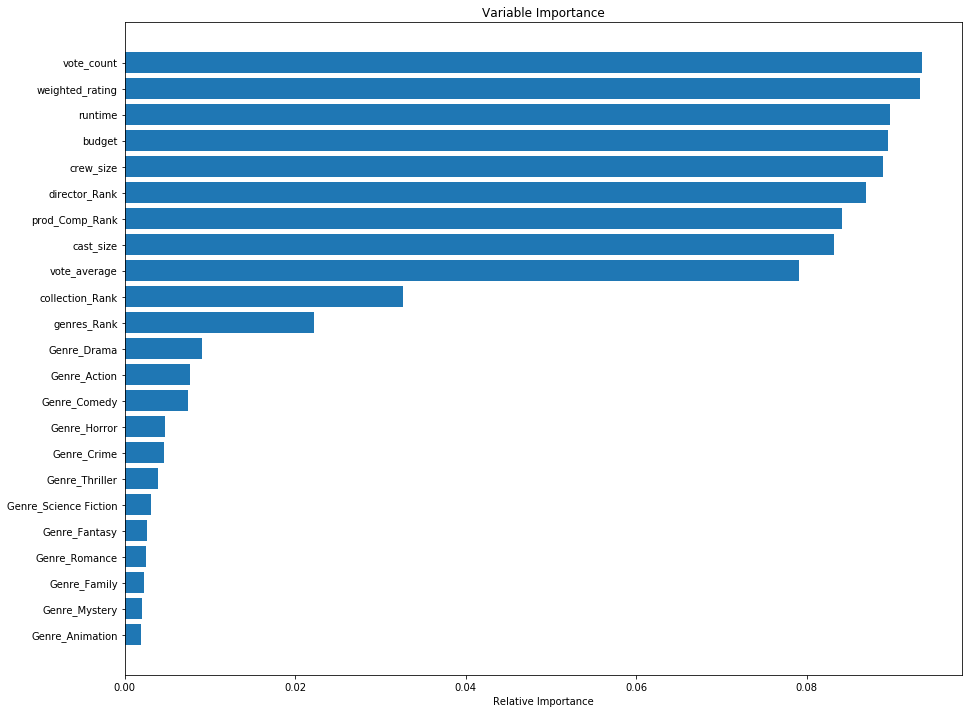

In [301]:
plt.subplots(figsize=(15, 12))

# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5
 
padding = padding[10:34]
sorted_importances = sorted_importances[10:33] 

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

In [302]:
X=df[['vote_count','budget','weighted_rating','runtime','cast_size','director_Rank','crew_size','prod_Comp_Rank','vote_average']]

In [303]:
type(X)

pandas.core.frame.DataFrame

In [304]:
X.shape

(5458, 9)

In [305]:
type(y)

pandas.core.series.Series

In [306]:
y.shape

(5458,)

In [307]:
# Import train_test_split function
from sklearn.model_selection import train_test_split


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [308]:
y_test.shape

(1638,)

In [309]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [310]:
#model 
polynomial_features= PolynomialFeatures(degree=2)

x_poly = polynomial_features.fit_transform(X_train)

predict_ = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
# predicting on training data-set
y_train_predicted = model.predict(x_poly)
  

In [312]:
 # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
#print(r2_train)

In [313]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
  

The model performance for the training set
-------------------------------------------
RMSE of training set is 79467101.69850683
R2 score of training set is 0.7717338885205508


In [314]:

y_test_pred = model.predict(predict_)

In [315]:
y_test_pred_series = pd.Series(y_test_pred)

In [316]:
y_test_pred_series.head()

0    4.186642e+08
1    2.785510e+07
2    4.886342e+07
3    6.432859e+07
4    8.396000e+07
dtype: float64

In [317]:
from sklearn.metrics import mean_squared_error, r2_score

In [318]:
 # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_series))
r2_test = r2_score(y_test, y_test_pred_series)

In [319]:
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the test set
-------------------------------------------
RMSE of test set is 76303580.01400016
R2 score of test set is 0.7846724860103068


In [320]:
#best scores
#2nd degree R²: 0.79
#3rd degree R²: 0.73
#4th degree R²: 0.51